 # Part 2: Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

## First Inspection: The most popular Names in 2018

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

1. __Loading__ and __inspecting__ the dataset "us_baby_names.csv". __Saveing__ the DataFrame in __df__.

In [30]:
df= pd.read_csv('us_baby_names.csv')

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


2. Finding the most popular __Baby Girl Names__ in __2018__. 

In [4]:
names_2018 = df[df.Year == 2018].copy()
names_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [5]:
names_2018.query('Gender =="F"').nlargest(10,'Count')

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [8]:
most_popular(2018,'F',10)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


3. __Creating__ the function __most_pop(year, gender, n)__ that returns the __n__ most popular __M/F__ Names in the __year XYZ__.

In [7]:
def most_popular(year,Gender,n):
    return df[(df.Year == year)&(df.Gender == Gender)].nlargest(n, 'Count')

4. Find the most popular __Baby Boy Names__ in __2018__.

In [9]:
most_popular(2018,'M',10)

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


## Evergreen Names (1880 - 2018)

5. Finding those __Evergreen Girl Names__ that are in __1880 and 2018__ among the most popular Girl Names (__Top 20__).

In [10]:
f_2018 = most_popular(2018,'F',20)
f_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [11]:
f_1880 = most_popular(1880,'F',20)
f_1880

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472
7,1880,Alice,F,1414
8,1880,Bertha,F,1320
9,1880,Sarah,F,1288


In [12]:
f_2018[['Name','Count']].merge(f_1880[['Name','Count']], how = 'inner', on = 'Name')

,Name,Count_x,Count_y
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


In [13]:
f_evergreen = f_2018[['Name','Count']].merge(f_1880[['Name','Count']], how = 'inner', \
                                             on = 'Name', suffixes = ('_2018', '_1880'), )

f_evergreen 


,Name,Count_2018,Count_1880
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


6. Finding those __Evergreen Boy Names__ that are in __1880 and 2018__ among the most popular Boy Names (__Top 20__).

In [14]:
m_2018 = most_popular(2018,'M',20)
m_2018

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


In [15]:
m_1880 = most_popular(1880,'M',20)
m_1880

,Year,Name,Gender,Count
942,1880,John,M,9655
943,1880,William,M,9532
944,1880,James,M,5927
945,1880,Charles,M,5348
946,1880,George,M,5126
947,1880,Frank,M,3242
948,1880,Joseph,M,2632
949,1880,Thomas,M,2534
950,1880,Henry,M,2444
951,1880,Robert,M,2415


In [16]:
m_evergreen = m_2018[['Name','Count']].merge(m_1880[['Name','Count']], how = 'inner', \
                                             on = 'Name', suffixes = ('_2018', '_1880'), )

m_evergreen 

,Name,Count_2018,Count_1880
0,William,14516,9532
1,James,13525,5927
2,Henry,10649,2444


## Advanced Data Aggregation

7. Creating __aggregated DataFrame agg__ :

In [17]:
df.groupby(['Name','Gender']).Count.sum().reset_index(level = -1)

,Gender,Count
Name,,
Aaban,M,114
Aabha,F,35
Aabid,M,16
Aabidah,F,5
Aabir,M,10
...,...,...
Zyvion,M,5
Zyvon,M,7
Zyyanna,F,6


In [31]:
agg = df.groupby(["Name","Gender"]).agg(Total = ("Count", "sum"), No_Year = ("Count", "count"), 
                                         First_Year = ("Year", "min"), Last_Year = ("Year", "max"),
                                         Max_Count = ("Count", "max"))

In [32]:
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


__How to interpret agg (and the first observation Aaban, M):__<br>
- There are in total 114 Male Babies with the name Aaban (Total)<br>
- The combination/entry (Aaban, M) can be found in 11 different years (No_Year)<br>
- The combination/entry (Aaban, M) appeared in the year 2007 for the first time (First_Year)<br>
- The last appearance was in the year 2018 (Last_Year)<br>
- In the most popular year, (Aaban, M) appeared 16 times (Max_Count)
- The most popular year for (Aaban, M) (Best_Year)

8. __Resetting__ the Index and create a RangeIndex.

In [33]:
agg.reset_index(inplace = True)
agg

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
0,Aaban,M,114,11,2007,2018,16
1,Aabha,F,35,5,2011,2016,9
2,Aabid,M,16,3,2003,2018,6
3,Aabidah,F,5,1,2018,2018,5
4,Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...,...
109168,Zyvion,M,5,1,2009,2009,5
109169,Zyvon,M,7,1,2015,2015,7
109170,Zyyanna,F,6,1,2010,2010,6
109171,Zyyon,M,6,1,2014,2014,6


9. __Filtering__ agg for the combination (Mary, F)

In [42]:
agg[(agg.Name == "Mary") & (agg.Gender == "F")]

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
68679,Mary,F,4125675,139,1880,2018,73985


## Most Popular Names of all Times

10. __Finding__ the __10 most popular__ Male and Female Names of all Times (most popular in terms of total count). 

In [45]:
agg

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
0,Aaban,M,114,11,2007,2018,16
1,Aabha,F,35,5,2011,2016,9
2,Aabid,M,16,3,2003,2018,6
3,Aabidah,F,5,1,2018,2018,5
4,Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...,...
109168,Zyvion,M,5,1,2009,2009,5
109169,Zyvon,M,7,1,2015,2015,7
109170,Zyyanna,F,6,1,2010,2010,6
109171,Zyyon,M,6,1,2014,2014,6


In [46]:
agg.groupby('Gender').apply(lambda x : x.nlargest(10, 'Total' ))

Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                     
F      68679        Mary      F  4125675      139        1880       2018   
       30706   Elizabeth      F  1638349      139        1880       2018   
       79184    Patricia      F  1572016      135        1884       2018   
       46567    Jennifer      F  1467207      101        1916       2018   
       62973       Linda      F  1452668      139        1880       2018   
       11699     Barbara      F  1434397      139        1880       2018   
       67371    Margaret      F  1248985      139        1880       2018   
       94540       Susan      F  1121703      139        1880       2018   
       28575     Dorothy      F  1107635      139        1880       2018   
       87546       Sarah      F  1077746      139        1880       2018   
M      43582       James      M  5164280      139        1880       2018   
       48388        John      M  5124817      139        1880       2018   
       84427      Robert      M  4820129      139        1880       2018   
       71023     Michael      M  4362731      139        1880       2018   
       104615    William      M  4117369      139        1880       2018   
       24204       David      M  3621322      139        1880       2018   
       49192      Joseph      M  2613304      139        1880       2018   
       83864     Richard      M  2565301      139        1880       2018   
       18299     Charles      M  2392779      139        1880       2018   
       98544      Thomas      M  2311849      139        1880       2018   

               Max_Count  
Gender                    
F      68679       73985  
       30706       20744  
       79184       56442  
       46567       63603  
       62973       99689  
       11699       48792  
       67371       28467  
       94540       47402  
       28575       39999  
       87546       28484  
M      43582       94757  
       48388       88319  
       84427       91640  
       71023       92704  
       104615      66989  
       24204       86253  
       49192       32732  
       83864       58868  
       18299       40770  
       98544       48652

In [48]:
all_times = agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total")).reset_index(drop = True)
all_times

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
0,Mary,F,4125675,139,1880,2018,73985
1,Elizabeth,F,1638349,139,1880,2018,20744
2,Patricia,F,1572016,135,1884,2018,56442
3,Jennifer,F,1467207,101,1916,2018,63603
4,Linda,F,1452668,139,1880,2018,99689
5,Barbara,F,1434397,139,1880,2018,48792
6,Margaret,F,1248985,139,1880,2018,28467
7,Susan,F,1121703,139,1880,2018,47402
8,Dorothy,F,1107635,139,1880,2018,39999
9,Sarah,F,1077746,139,1880,2018,28484


<AxesSubplot:xlabel='Name', ylabel='Total'>

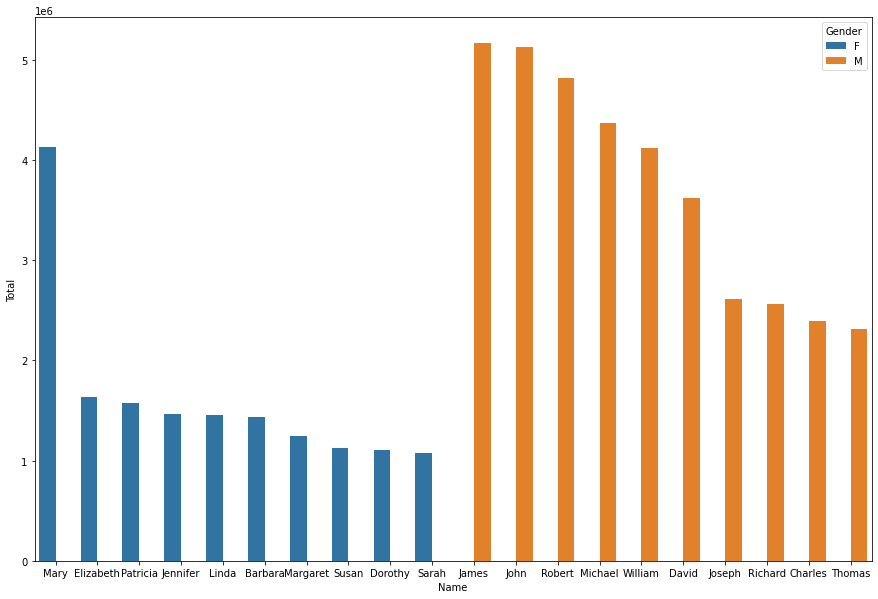

In [51]:
plt.figure(figsize = (15, 10))
sns.barplot(data = all_times, x = 'Name', y = 'Total', hue = 'Gender' )

## General Trends over time (1880 - 2018)

11. __Counting__ the total number of __registered Babies per Year__ and visualizing the data.

In [55]:
babies_by_year = df.groupby('Year').agg({'Count':'sum'})

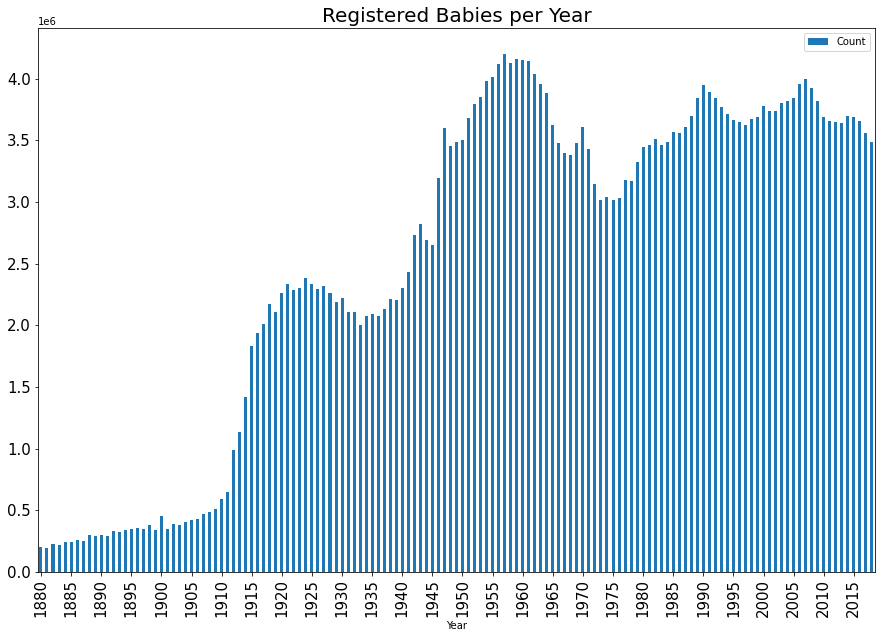

In [61]:
babies_by_year.plot(kind = "bar", y= "Count", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_by_year), 5)), labels =  range(1880, 2019, 5))
plt.title("Registered Babies per Year", fontsize = 20)
plt.show()

12. __Counting__ the total number of __Unique Names per Year__ and visualizing the data.

In [70]:
diff_names = df.groupby('Year').agg({'Name':'count'})
diff_names

,Name
Year,
1880,2000
1881,1935
1882,2127
1883,2084
1884,2297
...,...
2014,33243
2015,33121
2016,33010


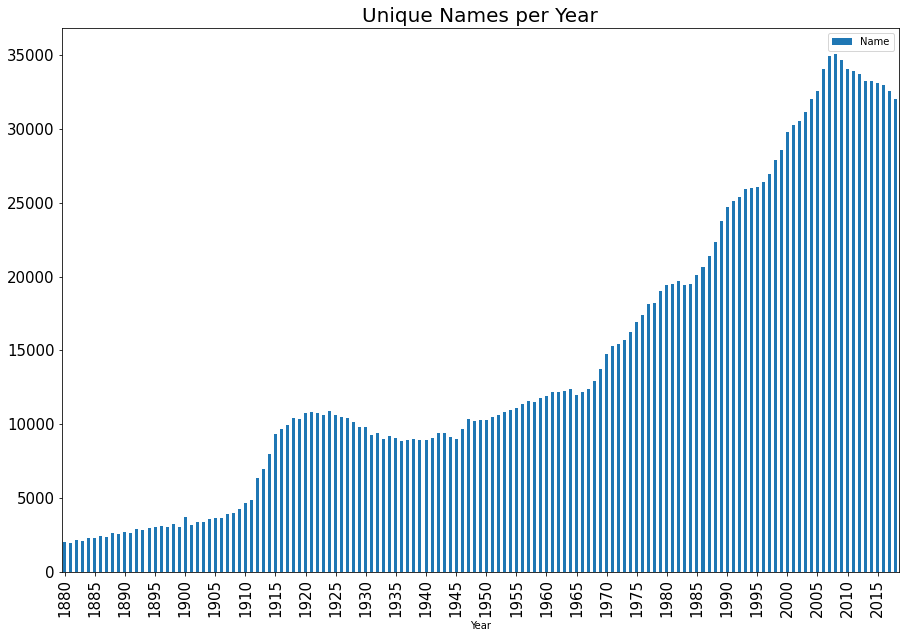

In [80]:
diff_names.plot(kind = 'bar', figsize = (15, 10), fontsize = 15 )
plt.xticks(ticks = (range(0,len(diff_names),5)),labels = range(1880,2019,5))
plt.title("Unique Names per Year",fontsize = 20)
plt.show()

## Creating the Features "Popularity" and "Rank"

13. __Adding__ the column __"Popularity"__ to df: <br> 

- Popularity in __babies per million__ (example: assume 2,000,000 registered Girl Names in 1950, thereof 100,000 Maries -> Popularity Score in 1950 for (Mary, F) is 100,000 / 2,000,000 * 1,000,000 = 50,000 per million.)  

In [88]:
df.groupby(['Year', 'Gender']).agg({'Count':'sum'})

Count
Year Gender         
1880 F         90994
     M        110490
1881 F         91953
     M        100743
1882 F        107847
...              ...
2016 M       1891585
2017 F       1719138
     M       1842837
2018 F       1686961
     M       1800392

[278 rows x 1 columns]

In [94]:
df.groupby(['Year', 'Gender']).Count.transform('sum')

0     90994
1     90994
2     90994
3     90994
4     90994
      ...  
65    90994
66    90994
67    90994
68    90994
69    90994
Name: Count, Length: 70, dtype: int64

In [95]:
df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

0         77642.48
1         28617.27
2         22012.44
3         21309.10
4         19188.08
            ...   
1957041       2.78
1957042       2.78
1957043       2.78
1957044       2.78
1957045       2.78
Name: Count, Length: 1957046, dtype: float64

In [96]:
df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

In [97]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642.48
1,1880,Anna,F,2604,28617.27
2,1880,Emma,F,2003,22012.44
3,1880,Elizabeth,F,1939,21309.10
4,1880,Minnie,F,1746,19188.08
...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.78
1957042,2018,Zyran,M,5,2.78
1957043,2018,Zyrie,M,5,2.78
1957044,2018,Zyron,M,5,2.78


14. __Add__ the column __"Rank"__ to df: <br> 

In [102]:
df.groupby(["Year", "Gender"]).Count.apply(lambda x : x.rank(ascending = False))

0             1.00
1             2.00
2             3.00
3             4.00
4             5.00
            ...   
1957041   13042.00
1957042   13042.00
1957043   13042.00
1957044   13042.00
1957045   13042.00
Name: Count, Length: 1957046, dtype: float64

In [104]:
df["Rank"] = df.groupby(["Year", "Gender"]).Count.apply(lambda x : x.rank(ascending = False))
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642.48,1.00
1,1880,Anna,F,2604,28617.27,2.00
2,1880,Emma,F,2003,22012.44,3.00
3,1880,Elizabeth,F,1939,21309.10,4.00
4,1880,Minnie,F,1746,19188.08,5.00
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.78,13042.00
1957042,2018,Zyran,M,5,2.78,13042.00
1957043,2018,Zyrie,M,5,2.78,13042.00
1957044,2018,Zyron,M,5,2.78,13042.00


## Visualizing Name Trends over Time

15. __Here I visualized__ Popularity and Rank over time (see example below) using __female name Mary__.

In [105]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642.48,1.00
1,1880,Anna,F,2604,28617.27,2.00
2,1880,Emma,F,2003,22012.44,3.00
3,1880,Elizabeth,F,1939,21309.10,4.00
4,1880,Minnie,F,1746,19188.08,5.00
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.78,13042.00
1957042,2018,Zyran,M,5,2.78,13042.00
1957043,2018,Zyrie,M,5,2.78,13042.00
1957044,2018,Zyron,M,5,2.78,13042.00


In [106]:
mary = df[(df.Name == "Mary") & (df.Gender == "F")]
mary

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642.48,1.00
2000,1881,Mary,F,6919,75244.96,1.00
3935,1882,Mary,F,8148,75551.48,1.00
6062,1883,Mary,F,8012,71332.54,1.00
8146,1884,Mary,F,9217,71439.09,1.00
...,...,...,...,...,...,...
1793168,2014,Mary,F,2632,1476.70,120.00
1826414,2015,Mary,F,2631,1477.71,123.00
1859539,2016,Mary,F,2508,1419.99,127.00
1892548,2017,Mary,F,2402,1397.21,126.00


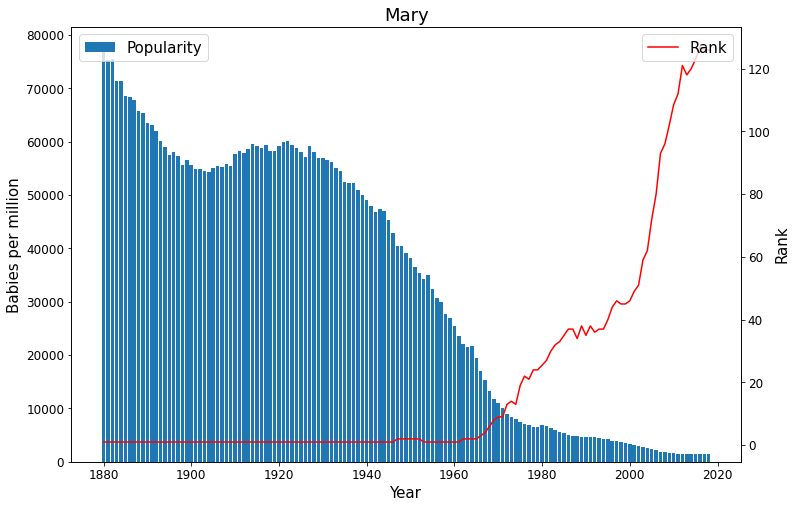

In [107]:
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.bar(x = mary.Year, height= mary.Popularity, label = "Popularity")
ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color = "red", label = "Rank")
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Babies per million", fontsize = 15)
ax2.set_ylabel("Rank", fontsize = 15)
ax1.set_title("Mary", fontsize = 18)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

## Persistant vs. Spike-Fade Names

In [108]:
agg

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
0,Aaban,M,114,11,2007,2018,16
1,Aabha,F,35,5,2011,2016,9
2,Aabid,M,16,3,2003,2018,6
3,Aabidah,F,5,1,2018,2018,5
4,Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...,...
109168,Zyvion,M,5,1,2009,2009,5
109169,Zyvon,M,7,1,2015,2015,7
109170,Zyyanna,F,6,1,2010,2010,6
109171,Zyyon,M,6,1,2014,2014,6


In [109]:
agg["Spike_Score"] = agg.Max_Count.div(agg.Total).mul(100)

In [111]:
agg.sort_values(by = "Spike_Score", ascending = True).head(20)

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Spike_Score
49192,Joseph,M,2613304,139,1880,2018,32732,1.25
30706,Elizabeth,F,1638349,139,1880,2018,20744,1.27
85133,Rosa,F,174125,139,1880,2018,2230,1.28
69242,Maurice,M,134504,139,1880,2018,1743,1.30
25419,Delia,F,36276,139,1880,2018,491,1.35
21172,Cornelius,M,35764,139,1880,2018,485,1.36
28009,Domingo,M,13797,121,1882,2018,190,1.38
68440,Marshall,M,91352,139,1880,2018,1270,1.39
97753,Teodoro,M,3079,111,1884,2018,43,1.40
103320,Victor,M,317673,139,1880,2018,4444,1.40


In [112]:
spike = agg[(agg.Total > 1000) & (agg.No_Year > 10)].sort_values(by = "Spike_Score",
                                                                 ascending = False).head(20)
spike

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Spike_Score
57027,Kizzy,F,2325,30,1977,2016,1116,48.00
77282,Oaklyn,F,1381,11,2006,2018,627,45.40
25998,Deneen,F,3603,52,1947,2007,1604,44.52
72223,Moesha,F,1067,14,1996,2014,426,39.93
67328,Mareli,F,1038,22,1995,2018,411,39.60
67337,Marely,F,2606,29,1989,2018,1004,38.53
51914,Kanye,M,1334,17,2002,2018,509,38.16
50988,Kairo,M,1632,24,1995,2018,605,37.07
97720,Tennille,F,2172,32,1975,2012,769,35.41
31996,Ensley,F,1241,20,1997,2018,432,34.81
